# Final Project

## Imports

In [1]:
# for data manipulation
import pandas as pd
import numpy as np

In [2]:
# data visualization package
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# for feature engineering
import time 
import datetime
import scipy.stats

In [4]:
# for train and test data set split
from sklearn.model_selection import train_test_split

# for grid search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# for evaluation metric
# accuracy
from sklearn.metrics import accuracy_score
# Report
from sklearn.metrics import classification_report
# AUC
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from pylab import rcParams

# for model comparision
from sklearn import metrics

In [5]:
# for decision tree model
from sklearn import tree

# for decision tree visualizaiton
from sklearn.externals.six import StringIO  
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus

# for gradient boosting
from sklearn.ensemble import GradientBoostingClassifier

# for random search
from sklearn.ensemble import RandomForestClassifier

## Preprocess Data

### Load and Join Data

In [5]:
# load inital data
bids = pd.read_csv("bids.csv")
bidders = pd.read_csv("train.csv")

In [5]:
bids.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3


In [6]:
bidders.head()

,bidder_id,payment_account,address,outcome
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0


The datasets are provided by two part:
* `train.csv`: the base bidder dataset with labels. Besides label, it also contains unique `bidder_id` followed with `payment_account`, `address` and `outcome`;
* `bids.csv`: the dataset contains some more useful information associated with unique `bidder_id`, including `auction`, `merchandise`, `device`, `time`, `country`, `ip`, and `url`. `time` and `url` are encrypted information.

Since both of these two files contains the unique key `bidder_id`, we firstly joined these data by this key. Our object is to try to find each bid is made by a human or robot, thus, we only consider the data which have bids information and labelled. We will left join on `train.csv` and check the joined data for missing bids information.

In [7]:
# join the training data set with full data set
bid = pd.merge(bidder, bids, on='bidder_id', how='left')

In [8]:
# write to file
bid.to_csv("bid.csv")

### Load Joined Data

In [6]:
data = pd.read_csv("bid.csv")
data.head()

,Unnamed: 0,bidder_id,payment_account,address,outcome,bid_id,auction,merchandise,device,time,country,ip,url
0,0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,85371.0,yitr4,home goods,phone35,9.759489e+15,ke,82.34.177.248,vasstdc27m7nks3
1,1,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,274487.0,btpyy,home goods,phone1004,9.760249e+15,zm,202.130.71.167,vasstdc27m7nks3
2,2,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,527436.0,kj2ko,home goods,phone4,9.762261e+15,ke,22.54.76.225,vasstdc27m7nks3
3,3,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,554135.0,1m5t8,home goods,phone4,9.762431e+15,ke,32.13.237.126,vasstdc27m7nks3
4,4,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,607628.0,btpyy,home goods,phone4,9.762789e+15,ke,202.236.188.240,vasstdc27m7nks3


### Data Clean: checking missing value

In [6]:
pd.isnull(data).any()

Unnamed: 0         False
bidder_id          False
payment_account    False
address            False
outcome            False
bid_id              True
auction             True
merchandise         True
device              True
time                True
country             True
ip                  True
url                 True
dtype: bool

In [8]:
nobids_train = data[pd.isnull(data['bid_id'])]['bidder_id'].unique()
len(nobids_train)

29

In [12]:
train[train['bidder_id'].isin(nobids_train)]['outcome']

49      0.0
88      0.0
175     0.0
236     0.0
262     0.0
271     0.0
299     0.0
305     0.0
339     0.0
364     0.0
620     0.0
633     0.0
741     0.0
750     0.0
773     0.0
808     0.0
908     0.0
997     0.0
1026    0.0
1052    0.0
1135    0.0
1149    0.0
1304    0.0
1496    0.0
1511    0.0
1551    0.0
1633    0.0
1729    0.0
1909    0.0
Name: outcome, dtype: float64

**There exist 29 bidders in bidder data set having no bid data. Since we aim to detect each bid whether a robot or human, we won't consider this data, and will just ignore them.**

In [9]:
# for all the missing value observation, drop it
bid = data[~data['bidder_id'].isin(nobids_train)]

In [17]:
pd.isnull(bid).any()

Unnamed: 0         False
bidder_id          False
payment_account    False
address            False
outcome            False
bid_id             False
auction            False
merchandise        False
device             False
time               False
country             True
ip                 False
url                False
dtype: bool

In [24]:
pd.isnull(bid['country']).sum()/len(bid)*100

0.08794539245590682

**For the full data set, there are only few of observations (0.088%) missing country entry. We will just ignore the missing country entry data.**

In [10]:
# for all the missing value observation, drop it
bid = bid.dropna()

In [19]:
pd.isnull(bid).any()

Unnamed: 0         False
bidder_id          False
payment_account    False
address            False
outcome            False
bid_id             False
auction            False
merchandise        False
device             False
time               False
country            False
ip                 False
url                False
dtype: bool

### Data Exploration

In [15]:
print(f"total row in bid:          {len(bid)}")
print(f"total bids in bid:         {len(bid['bid_id'].unique())}")
print(f"total bidder in bids:      {len(bid['bidder_id'].unique())}")
print(f"total payment in bids:     {len(bid['payment_account'].unique())}")
print(f"total address in bids:     {len(bid['address'].unique())}")
print(f"total auction in bids:     {len(bid['auction'].unique())}")
print(f"total merchandise in bids: {len(bid['merchandise'].unique())}")
print(f"total device in bids:      {len(bid['device'].unique())}")
print(f"total country in bids:     {len(bid['country'].unique())}")
print(f"total ip in bids:          {len(bid['ip'].unique())}")
print(f"total url in bids:         {len(bid['url'].unique())}")

total row in bid:          3068523
total bids in bid:         3068523
total bidder in bids:      1983
total payment in bids:     1983
total address in bids:     1983
total auction in bids:     12740
total merchandise in bids: 10
total device in bids:      5726
total country in bids:     198
total ip in bids:          1028810
total url in bids:         663265


**From this output, we can see the payment and address is one-to-one correspondence, we can igonre these two features.**

In [16]:
print(f"total bids made by robot in data set: {len(bid[bid['outcome'] == 1])}")
print(f"total bids made by human in data set:  {len(bid[bid['outcome'] == 0])}")

total bids made by robot in train set: 412153
total bids made by human in train set:  2656370


**These trainning data set has unbalanced number of robots and human, we need to do undersampling before training the model.**

### Feature Creation

In [11]:
# bidding time difference per user (bidder_id) 
bid = bid.sort_values(by=['time'])
bid['timediffs'] = bid.groupby('bidder_id')['time'].transform(pd.Series.diff)

# number of bids a user made per auction
bids_per_auction  = bid.groupby(['auction','bidder_id']).size()
bids_per_auction = bids_per_auction.to_frame()

# proportion of bots for each country
pbots_country = bid[bid['outcome'] == 1].groupby('country').size()/bid.groupby('country').size() 
pbots_country = pbots_country.fillna(0)
pbots_country = pbots_country.to_frame()

# proportion of bots per device
pbots_device = bid[bid['outcome'] == 1].groupby('device').size()/bid.groupby('device').size()
pbots_device = pbots_device.fillna(0)
pbots_device = pbots_device.to_frame()

# number of unique ip to number of bids ratio
ip_bids_ratio = bid.groupby('bidder_id')['ip'].nunique()/bid.groupby('bidder_id')['bid_id'].nunique()
ip_bids_ratio = ip_bids_ratio.to_frame()

# mean per auction url entropy for each user
# Input a pandas series 
def ent(data):
    p_data= data.value_counts()/len(data) # calculates the probabilities
    entropy=scipy.stats.entropy(p_data)  # input probabilities to get the entropy 
    return entropy

auction_url_entropy = bid.groupby(['auction','bidder_id'])['url'].apply(ent)
auction_url_entropy = auction_url_entropy.groupby('bidder_id').mean().reset_index()

In [12]:
# merge the features back
bid = pd.merge(bid,bids_per_auction, on=['auction','bidder_id'],how='left')
bid = pd.merge(bid,pbots_country, on='country',how='left')
bid = pd.merge(bid,pbots_device, on='device',how='left')
bid = pd.merge(bid,ip_bids_ratio, on='bidder_id',how='left')
bid = pd.merge(bid,auction_url_entropy,on='bidder_id',how='left')
# set column names 
bid.columns = ['Unnamed: 0', 'bidder_id', 'payment_account', 'address', 'outcome',
       'bid_id', 'auction', 'merchandise', 'device', 'time', 'country',
       'ip', 'url', 'timediffs', 'bids_per_auction', 'pbots_country', 'pbots_device', 
               'ip_bids_ratio','auction_url_entropy']

### Feature visualization

/Users/crystal/anaconda3/envs/ml/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/crystal/anaconda3/envs/ml/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/crystal/anaconda3/envs/ml/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


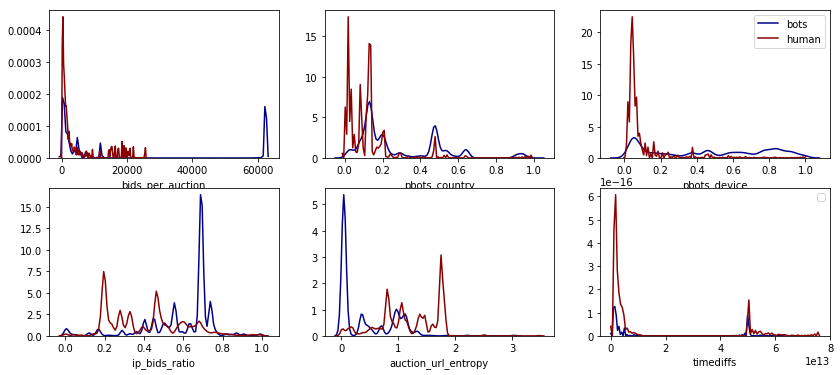

In [13]:
bots = bid.loc[bid.outcome==1]
human = bid.loc[bid.outcome==0]

fig, axes = plt.subplots(2, 3, figsize=(14, 6), sharex=False)
sns.distplot(bots['bids_per_auction'], hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue',
             kde_kws={'linewidth': 1.5}, ax=axes[0, 0])
sns.distplot(human['bids_per_auction'], hist=False, kde=True, 
             bins=int(180/5), color = 'darkred', 
             kde_kws={'linewidth': 1.5}, ax=axes[0, 0])

sns.distplot(bots['pbots_country'], hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             kde_kws={'linewidth': 1.5},ax=axes[0, 1])
sns.distplot(human['pbots_country'], hist=False, kde=True, 
             bins=int(180/5), color = 'darkred', 
             kde_kws={'linewidth': 1.5},ax=axes[0,1])

sns.distplot(bots['pbots_device'], hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue', label = 'bots',
             kde_kws={'linewidth': 1.5},ax=axes[0,2])
sns.distplot(human['pbots_device'], hist=False, kde=True, 
             bins=int(180/5), color = 'darkred', label = 'human',
             kde_kws={'linewidth': 1.5},ax=axes[0,2])

sns.distplot(bots['ip_bids_ratio'], hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             kde_kws={'linewidth': 1.5},ax=axes[1,0])
sns.distplot(human['ip_bids_ratio'], hist=False, kde=True, 
             bins=int(180/5), color = 'darkred', 
             kde_kws={'linewidth': 1.5},ax=axes[1,0])

sns.distplot(bots['auction_url_entropy'], hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             kde_kws={'linewidth': 1.5},ax=axes[1,1])
sns.distplot(human['auction_url_entropy'], hist=False, kde=True, 
             bins=int(180/5), color = 'darkred', 
             kde_kws={'linewidth': 1.5},ax=axes[1,1])

sns.distplot(bots['timediffs'], hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             kde_kws={'linewidth': 1.5},ax=axes[1,2])
sns.distplot(human['timediffs'], hist=False, kde=True, 
             bins=int(180/5), color = 'darkred', 
             kde_kws={'linewidth': 1.5},ax=axes[1,2])
plt.legend(['bots','human'])
plt.show()

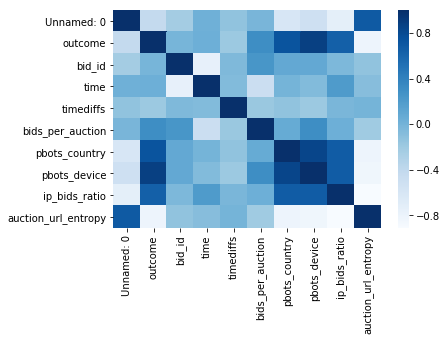

In [14]:
corr_matrix = bid.corr()
## Plot the correlation matrix for the numerical values
sns.heatmap(corr_matrix.corr(), 
        xticklabels=corr_matrix.corr().columns,
        yticklabels=corr_matrix.corr().columns,
           cmap="Blues",
           fmt='d')

In [ ]:
# add some interpretation about the above two plots 
# and justify why we need to ignore the variable timediff

Fit scikit-learn model
----

### Split Train and Test set

In [15]:
y = bid['outcome']
#X = bid_balance.iloc[:,-6:]
X = bid.iloc[:,-5:]
bid_train, bid_test= train_test_split(bid, test_size=0.2)

### Under Sampling

In [16]:
bots_train = bid_train.loc[bid_train.outcome == 1]
human_train = bid_train.loc[bid_train.outcome == 0]
human_sample = human_train.sample(n=len(bots_train))
bid_train_balance = pd.concat([bots_train,human_sample])

y_train = bid_train_balance['outcome']
X_train = bid_train_balance.iloc[:,-5:]
y_test = bid_test['outcome']
X_test = bid_test.iloc[:,-5:]

### First Model : Decision Tree

In [ ]:
# Grid Search for hyperparameter of decision tree
clf = tree.DecisionTreeClassifier()
param_grid = { 
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(3,6),
    'max_leaf_nodes':range(10,15),
    'min_samples_split':range(2,6)
}

clf_cv = GridSearchCV(estimator=clf, 
                      param_grid=param_grid, 
                      cv=5)
clf_cv.fit(X_train, y_train)
print(clf_cv.best_params_)

In [17]:
# fit the model with best parameters
# Decision Tree
kwargs_regularize = dict(criterion='gini',
                         max_depth = 5,
                         max_leaf_nodes=14, 
                         min_samples_split=2)
clf = tree.DecisionTreeClassifier(**kwargs_regularize)
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=14,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Tree Visualization

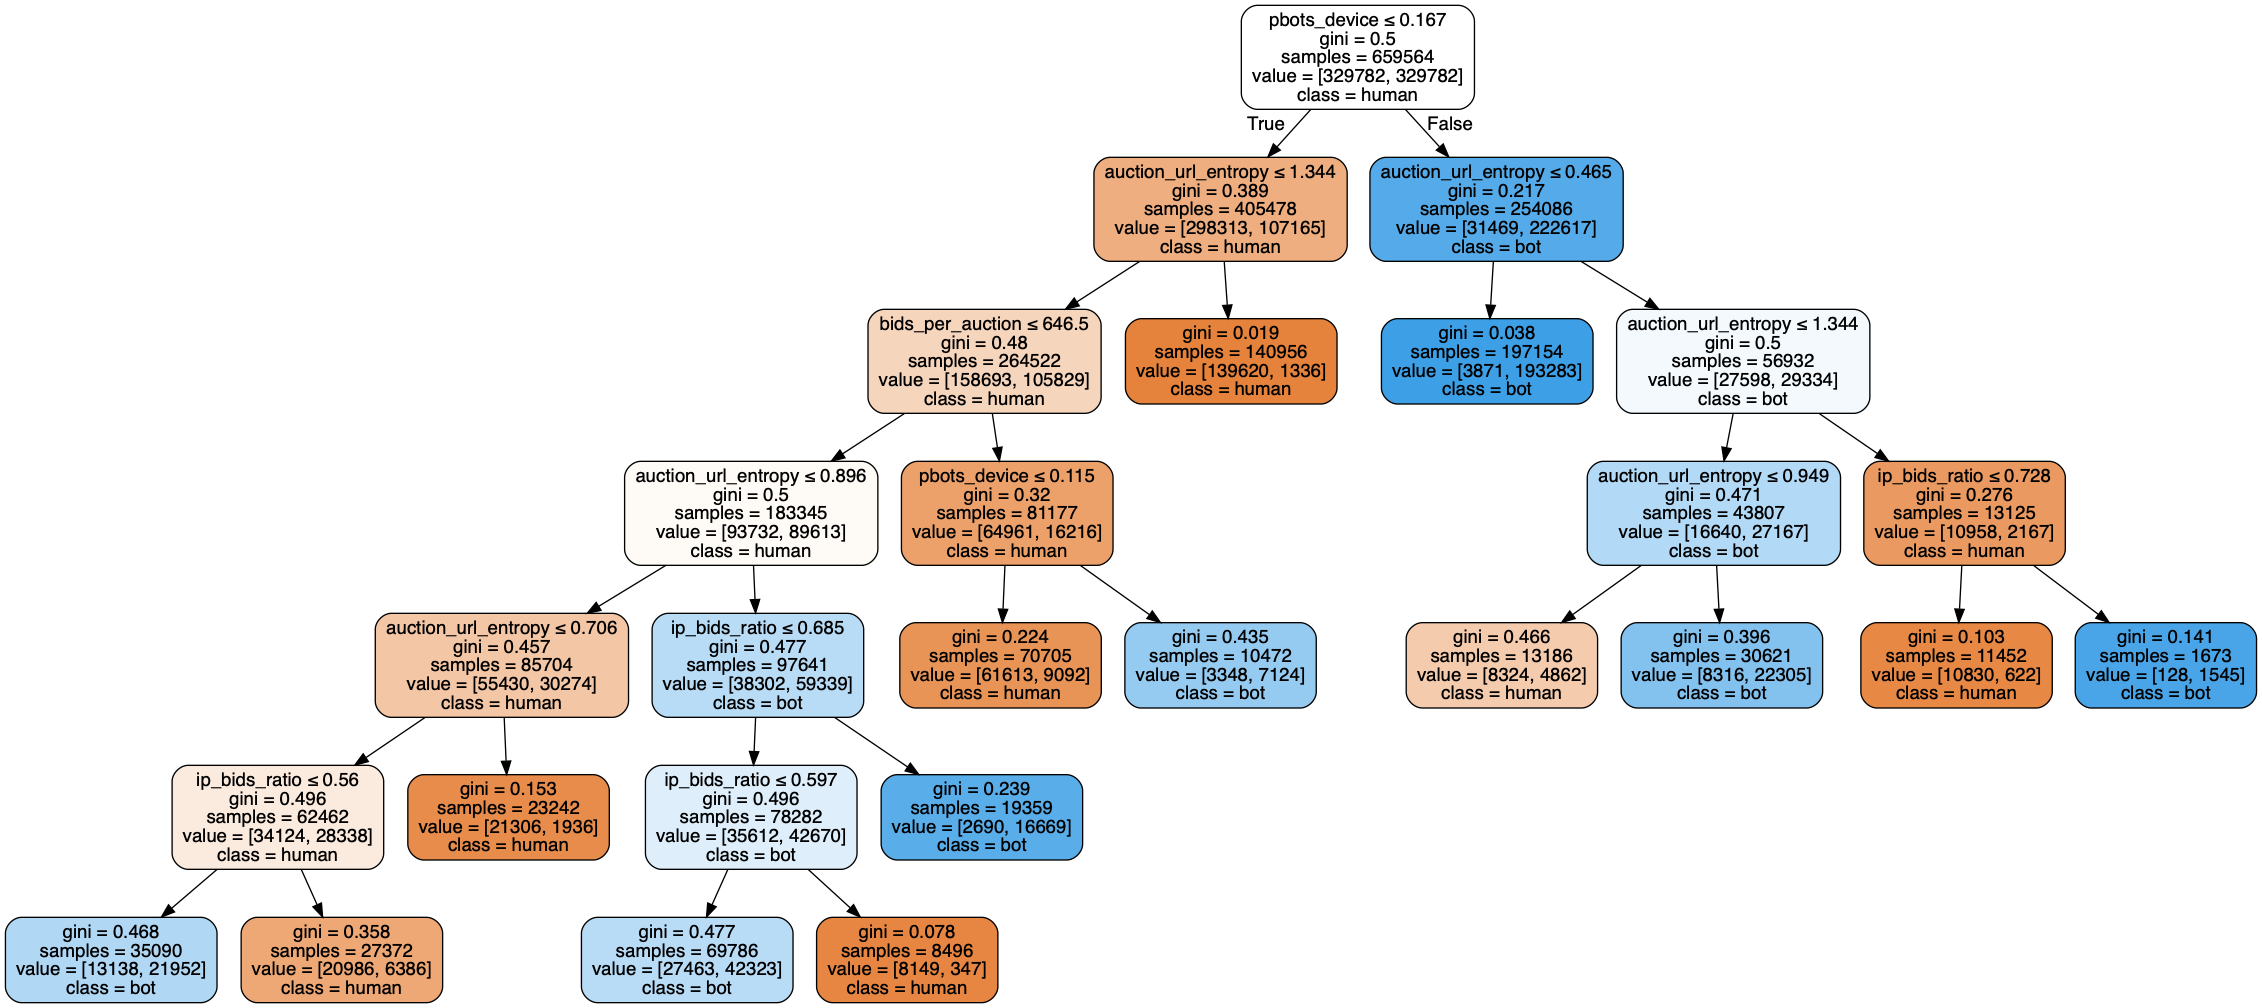

In [18]:
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, 
                         filled=True, rounded=True,
                     feature_names=X.columns.values,
                     class_names = ['human','bot'],
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [19]:
graph.write_png("tree.png")

True

Evaluation Metric
----

In [20]:
# predict
y_dt_pred = clf.predict(X_test)
y_dt_score = clf.predict_proba(X_test)[:,1]

### Accuracy

In [21]:
# accuracy score
print(f"Decision Tree Accuracy: {accuracy_score(y_dt_pred, y_test):.3f}")

Decision Tree Accuracy: 0.835


### Pecision vs Recall

In [23]:
print(classification_report(y_test,y_dt_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.82      0.90    531334
         1.0       0.45      0.93      0.60     82371

   micro avg       0.84      0.84      0.84    613705
   macro avg       0.72      0.87      0.75    613705
weighted avg       0.91      0.84      0.86    613705



### AUC

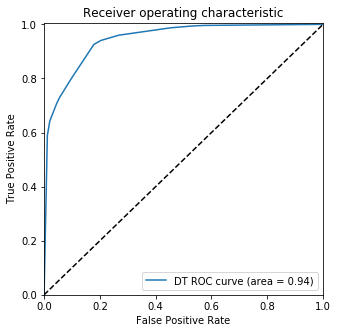

In [25]:
# Plot ROC in one graph
fpr_dt, tpr_dt, _dt = roc_curve(y_test, y_dt_score)
roc_dt_auc = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(5,5))
plt.plot(fpr_dt, tpr_dt, label='DT ROC curve (area = %0.2f)' % roc_dt_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.005])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Gradient Boosting

In [ ]:
# grid search
gb = GradientBoostingClassifier(n_estimators=10)
param_grid = { 
    'max_depth': range(3,6),
    'max_leaf_nodes' : range(8,11)
}

gb_cv = GridSearchCV(estimator=gb, 
                      param_grid=param_grid, 
                      cv=5)
gb_cv.fit(X_train, y_train)
print(gb_cv.best_params_)

In [26]:
gb = GradientBoostingClassifier(n_estimators=100,max_depth=5,max_features='sqrt',
                                 max_leaf_nodes=9)
gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features='sqrt', max_leaf_nodes=9,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

Evaluation Metric
----

In [27]:
y_gb_pred = gb.predict(X_test)

### Accuracy

In [28]:
print(f"Gradient Boosting Accuracy: {accuracy_score(y_gb_pred, y_test):.3f}")

Gradient Boosting Accuracy: 0.979


### Precision vs Recall

In [29]:
print(classification_report(y_test,y_gb_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99    531334
         1.0       0.87      0.98      0.92     82371

   micro avg       0.98      0.98      0.98    613705
   macro avg       0.93      0.98      0.96    613705
weighted avg       0.98      0.98      0.98    613705



### AUC

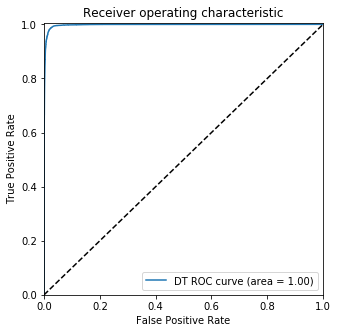

In [30]:
# Plot ROC in one graph
y_gb_score = gb.predict_proba(X_test)[:,1]
fpr_gb, tpr_gb, _gb = roc_curve(y_test, y_gb_score)
roc_gb_auc = auc(fpr_gb, tpr_gb)

plt.figure(figsize=(5,5))
plt.plot(fpr_gb, tpr_gb, label='DT ROC curve (area = %0.2f)' % roc_gb_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.005])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
fig.savefig('roc_gb_auc.png')

## Random Forest

In [ ]:
# grid search
rf= RandomForestClassifier(n_estimators=50)
param_grid = { 
    'max_depth': range(3,6),
    'max_leaf_nodes' : range(8,12),
    'max_features':['sqrt','auto','log2']
}

rf_cv = GridSearchCV(estimator=rf, 
                      param_grid=param_grid, 
                      cv=5)
rf_cv.fit(X_train, y_train)
print(rf_cv.best_params_)

In [31]:
rf= RandomForestClassifier(n_estimators=100,max_depth=5,
                           max_leaf_nodes=11,max_features='log2', 
                                bootstrap=True,oob_score=True)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='log2', max_leaf_nodes=11,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

## Evaluation Metric

In [32]:
y_rf_pred = rf.predict(X_test)

### Accuracy

In [33]:
print(f"Decision Tree Accuracy: {accuracy_score(y_rf_pred, y_test):.3f}")

Decision Tree Accuracy: 0.923


### Precision vs Recall

In [34]:
print(classification_report(y_test,y_rf_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95    531334
         1.0       0.66      0.88      0.75     82371

   micro avg       0.92      0.92      0.92    613705
   macro avg       0.82      0.90      0.85    613705
weighted avg       0.94      0.92      0.93    613705



### AUC

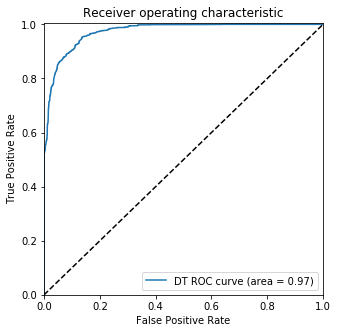

In [35]:
# Plot ROC in one graph
y_rf_score = rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, _rf = roc_curve(y_test, y_rf_score)
roc_rf_auc = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(5,5))
plt.plot(fpr_rf, tpr_rf, label='DT ROC curve (area = %0.2f)' % roc_rf_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.005])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
fig.savefig('roc_rf_auc.png')

## Compare Different Models

In [36]:
dt_metrics = [metrics.accuracy_score(y_test,y_dt_pred),metrics.precision_score(y_test,y_dt_pred),
     metrics.recall_score(y_test,y_dt_pred),metrics.f1_score(y_test,y_dt_pred),
     metrics.roc_auc_score(y_test,y_dt_pred)]
rf_metrics = [metrics.accuracy_score(y_test,y_rf_pred),metrics.precision_score(y_test,y_rf_pred),
     metrics.recall_score(y_test,y_rf_pred),metrics.f1_score(y_test,y_rf_pred),
     metrics.roc_auc_score(y_test,y_rf_pred)]
gb_metrics = [metrics.accuracy_score(y_test,y_gb_pred),metrics.precision_score(y_test,y_gb_pred),
     metrics.recall_score(y_test,y_gb_pred),metrics.f1_score(y_test,y_gb_pred),
     metrics.roc_auc_score(y_test,y_gb_pred)]

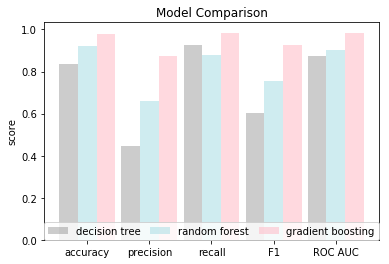

In [37]:
fig, ax = plt.subplots()
index = np.arange(5)
width = 0.3
b1 = plt.bar(index, dt_metrics, width, alpha=0.4, color='grey', label='decision tree')
b2 = plt.bar(index+width, rf_metrics, width, alpha=0.6, color='powderblue', label='random forest')
b3 = plt.bar(index+2*width, gb_metrics, width, alpha=0.6, color='pink', label='gradient boosting')
plt.title('Model Comparison')
plt.ylabel('score')
plt.xticks(index+width,('accuracy','precision','recall','F1','ROC AUC'))
plt.legend(loc=8,ncol=3, mode="expand", borderaxespad=0.)
plt.show()
fig.savefig('model_comparison.png')